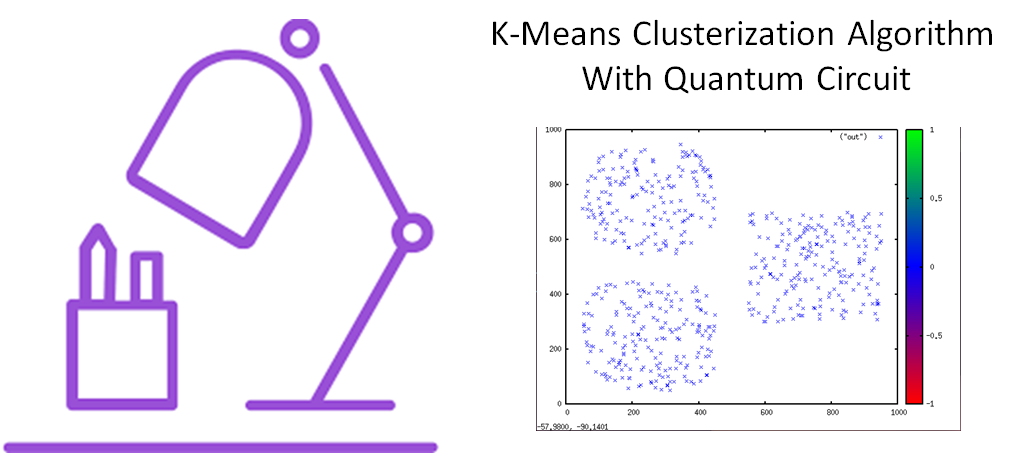

By Ennio Picarelli 
## Part 1 - Classical Calculation

## Let's have a look at K-means	algorithm

K-means is an unsupervised machine learning algorithm to identify homogeneous groups in a data set. Not supervised because the training phase of the model does not involve the use of labelled data but the recognition of groups occurs autonomously. The fields of application are numerous and vary from the recognition of similar behaviors in consumers (market segmentation) aimed at the design of customized marketing campaigns, to the grouping of documents that talk about the same topic (cluster), to the reduction of the size of image files through the reduction of basic colors, etc.. 

In this work we will show an application of K-means in the classification of data starting from the use of classical libraries present on Python and arriving at the use of a quantum circuit that promises a significant theoretical processing speed-up. 

In extreme synthesis, the algorithm is based on the identification of an optimal number of groups in which to divide the data, on the iterative identification of the centers (centroids) of these groups in the n-dimensional space of the features of the data and on the contextual association of the same data to the various groups. The algorithm is iterative and starts from an initial random assignment of the centroids, then groups the data for greater proximity to the centroids, recalculates the new centroids as the midpoint, for each group, of the data belonging to it and starts again. When the position of the centroids and the belonging of the data to the groups does not vary, it is assumed that the algorithm converges.

The objective of K-means optimization is to minimize the quadratic error of the dispersion of the points with respect to the centroids, which is equivalent to minimizing the Euclidean distance from the centroids themselves. In the following we will see some mathematical details of the algorithm. 

$x^{(i)}\ with\ i\ from\ 1\ to\ m\ =\ number\ of\ example\ data$

$c^{(i)}=index\ of\ cluster\ (1,2,3,..K)\ to\ which\ example\ datum\ x^{(i)}\ has\ been\ assigned \ (closest\ to\  x^{(i)})$

$\mu_k=\ k-th \ \ cluster\ centroid (\mu_k \in R^n)$

$\mu_c^{(i)}=\ centroid\ of\ cluster\ to\ which\ example\ has\ been\ assigned$

Optimization\ Objective

$J(c^{(i)},...,c^{(m)},\mu_1,...,\mu_K)=\frac{1}{m} \sum_{i=1}^{m}||{x^{(i)}-\mu_c^{(i)}}||^2$

$\ \ min\ J(c^{(i)},...,c^{(m)},\mu_1,...,\mu_K)\$

$c^{(i)},...,c^{(m)}$

$\mu_1,...,\mu_K$

Randomly initialize $ k$ Cluster Centroids: $\mu_1,\mu_2,\mu_3,\mu_k \in R^n\ then$

$Repeat \{ $

$      \quad \ For\ i=1\ to\ m$

$      \quad\quad \ \ \ c^{(i)}:=index\ (from\ 1\ to\ k)\ of\ cluster\ centroid\ closest\ to\ x^{(i)}$

$      \quad\quad \ For\ k=1\ to\ K$

$      \quad\quad\quad\ \ \ \mu_k:=average(mean)\ of\ points\ assigned\ to\ cluster$

$\}$

The right definition of the K number of centroids can be supported by means of some tools, the most common is the 
Elbow method


In this method the value of J is calculated for various numbers of K and the elbow point of the curve will be choosen as the right K value for calculation (in the curve case the value is 2).

# Example of classic clustering and quantum dataset setup
Clustering is performed on sample data from public datasets on Kaggle related to market segmentation.
Clustering is first performed on normal Cartesian coordinates.
Clustering Cartesian coordinates are the two parameters of __annual income__ and __spending score__
The Elbow method is also used to determine the optimal number of clusters.
The calculation is then repeated by transforming the calculating dataset:

Theta = arctan(annual income/spending score)*10000$

(Multiplies by 10,000 to improve accuracy)

Then clustering is performed with respect to the dimensions __customer ID__ and __Theta__

It is observed that both the number of clusters and the clustering maintain the topological validity

20 points are chosen to perform the quantum calculation (only 20 points are chosen to avoid processing too long)

In [1]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

In [2]:
#importing the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization

In [3]:
df_data_3 = pd.read_csv('DataForQComparison.csv')
df_data_3.head()
dataset=df_data_3

## Data verification and creation of the Theta column
The most relevant features for data clusterization are Spending Score and the Annual Income and therefore we decide to derive a new characteristic that is related to the ratio between these two parameters. In particular the derivate feature will be the arctangent of the ratio.

In [4]:
#total rows and colums in the dataset
dataset.shape

(20, 2)

In [5]:
#add theta angle for only 2 features (Annual income and Spending Score)
dataset['Theta']=np.arctan(dataset['Annual Income_k$'].values.astype(int)/dataset['Spending Score_1_to_100'].values.astype(int))*10000
dataset['ID']=dataset.reset_index().index
dataset.head(10)

,Annual Income_k$,Spending Score_1_to_100,Theta,ID
0,19,99,1896.136158,0
1,29,87,3217.505544,1
2,21,66,3080.527810,2
3,34,73,4358.769724,3
4,21,35,5404.195003,4
5,34,17,11071.487178,5
6,20,15,9272.952180,6
7,33,4,14501.726582,7
8,46,46,7853.981634,8
9,49,55,7277.697359,9


## Data display of the model to be clustered

In [6]:
### Feature sleection for the model
#Considering only 2 features (Annual income and Spending Score) and no Label available
X= dataset.iloc[:, [0,1]].values.astype(int)

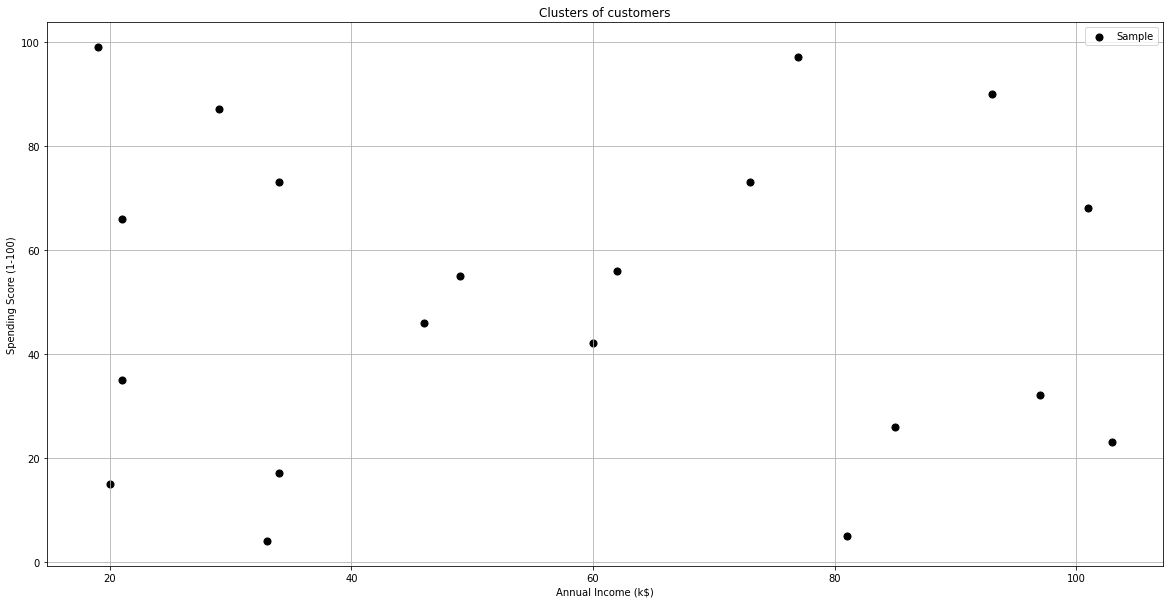

In [7]:
#Visualizing data

plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], s = 50, c = 'black', label = 'Sample')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

# Model transformation by switching to Theta + customer ID
Now we will show that the clusterization doesn't change if we substitute the previous features with Theta + Customer ID

In [8]:
### Feature sleection for the model
#Considering only 2 features (ID + Theta) and no Label available
X= dataset.iloc[:, [3,2]].values.astype(float)

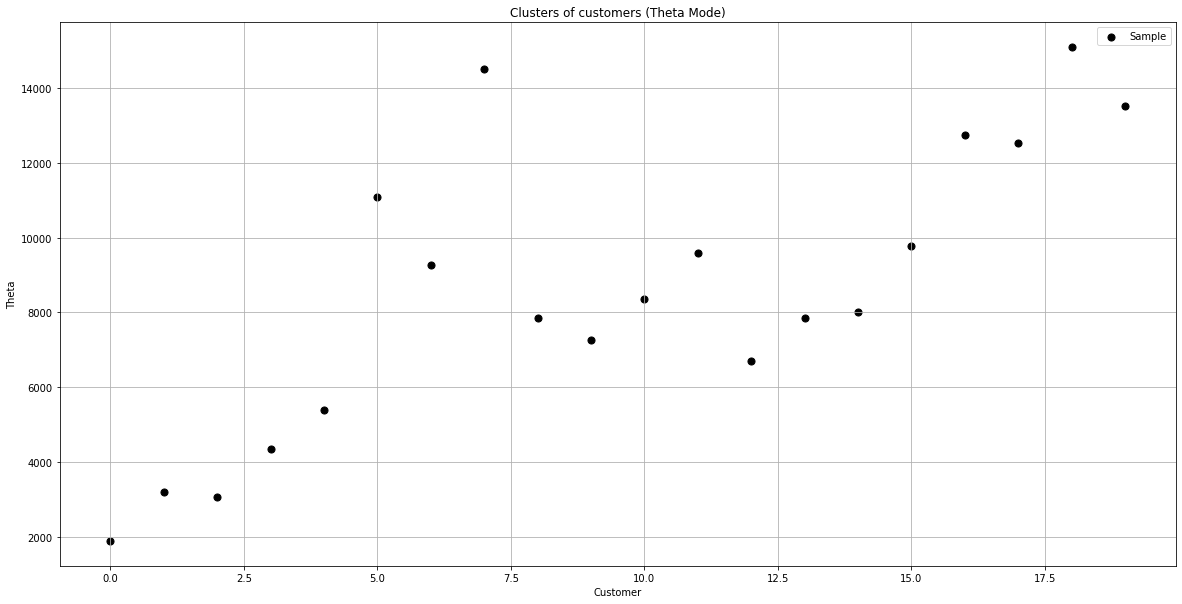

In [9]:
#Visualizing data

plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], s = 50, c = 'black', label = 'Sample')
plt.title('Clusters of customers (Theta Mode)')
plt.xlabel('Customer')
plt.ylabel('Theta')
plt.legend()
plt.grid()
plt.show()

## Creating the model with sklearn
First of all we must find the right K value

In [10]:
!pip install sklearn
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,21):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42,max_iter=10000,tol=0.000001)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\PF857XF\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## The elbow of the curve is corresponding to 3 clusters so we will build the model for K=3

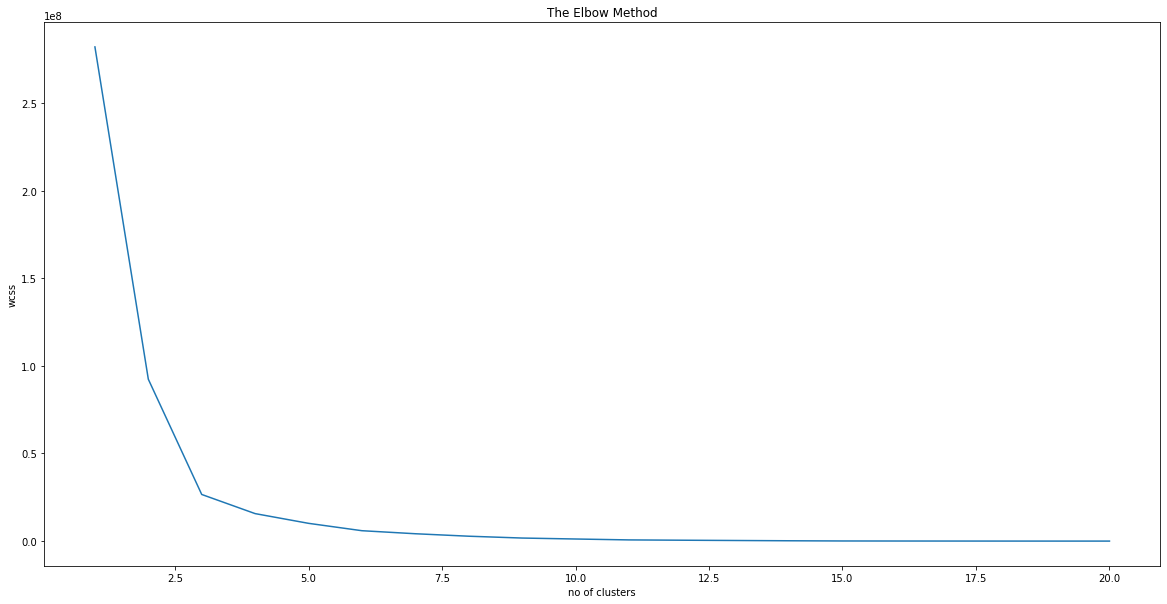

In [11]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.figure(figsize=(20,10))
plt.plot(range(1,21), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

## Clustering on reduced data and standard features

In [12]:
#If you zoom out this curve then you will see that last elbow comes at k=3

#Model Build
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=42,max_iter=100000,tol=0.00000001, verbose=0)
y_kmeans= kmeansmodel.fit_predict(X)
kmeans= kmeansmodel.fit(X)

In [13]:
#shows to which cluster point belongs
print(y_kmeans)

[1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 2 2 2 2]


In [14]:
#centroid position
centers_float = kmeans.cluster_centers_
centers=np.rint(centers_float).astype(int)
print(centers)

[[   11  8303]
 [    2  3591]
 [   14 13239]]


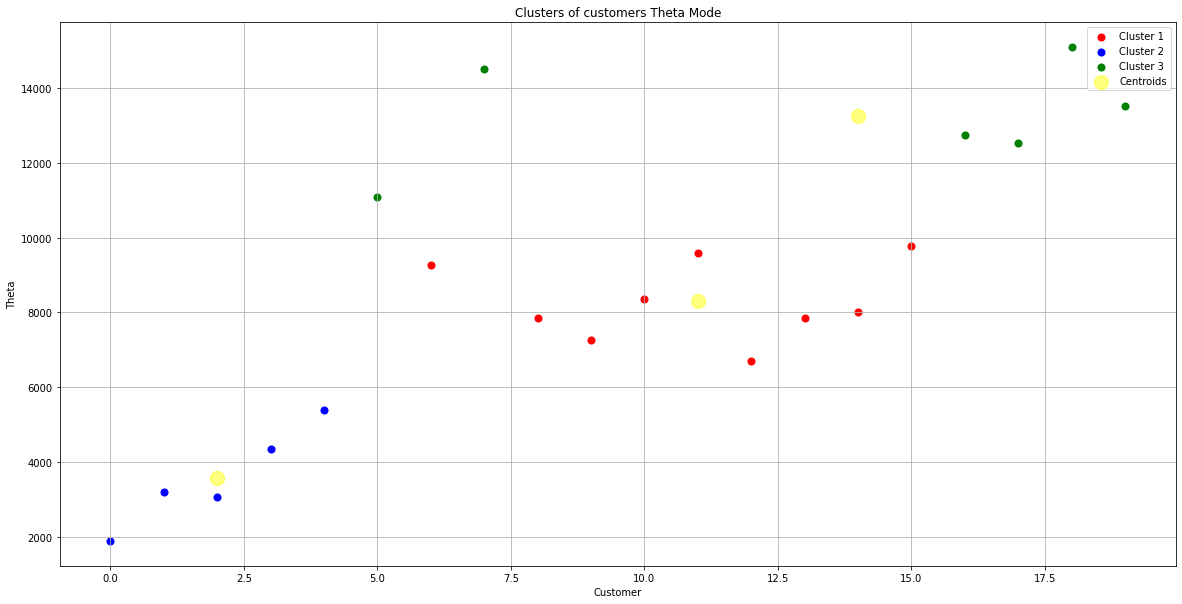

In [15]:
#Visualizing all the clusters 

plt.figure(figsize=(20,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
  
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5,label = 'Centroids');
plt.title('Clusters of customers Theta Mode')
plt.xlabel('Customer')
plt.ylabel('Theta')
plt.legend()
plt.grid()
plt.show()



## Part 2 - Quantum Calculation

Inspired by the article _Quantum K-Means algoritm_ written by Shan Jin, Xi He, Xiaokai Hou, Li Sun, Dingding Wen, Shaojun Wu, and Xiaoting Wang

## Determination of the distance between two points in quantum logic

Let's see how to apply a quantum circuit to calculate the distance between two points.

It is not a real Euclidean distance but a measure of the probability for the two qubits at which has been imposed a  'rotation' equal to the $\theta_1\quad and\quad \theta_2\quad $angle of being considered as equal (the more the angle are close, the more increases this probability)

## But first ... let's recall some concepts of quantum computing:

$\text a)\quad superposition$

is the ability of a qubit to assume simultaneously more logical states that vary continuously from the value 0 to the value 1. The superposition on a quantum computer is obtained by applying to the qubit a Hadamard gate that gives a rotation to the qubit around the z+x axis. This rotation involves the transformation of Z into X and of X into Z. We can see the effect through the bloch sphere that represents the qubit before and after the application of the port.



$\text b)\quad entanglement$

It is the characteristic that binds some qubits together and makes them become part of a single quantum system. In this case what happens to a qubit is reflected instantly to the other qubits of the system. To achieve entanglement between qubits, the quantum computer uses controlled gates that determine the state of one or more qubits together on the basis of the value assumed by a qubit controller (or ancilla qubit).


## The c-swap circuit


The circuit is composed by a so called controlled swap (c-swap) or Fredkin circuit. An ancilla bit is controlling two input X and Y. If the Ancilla value is 1 then the X and Y values are swapped. In Classic Computing the truth tabel of the circuit is the following:

Classic computing truth table


We can see that the ancilla 1 acts only when the values of the controlled bit are different so, in this case, the relation between ancilla and X,Y can be compared to that of the input of an XOR or a difference without sign of two bits and their output:




In the Quantum implementation of this example the ancilla bit is put in superposition state by using a Hadamard gate, then another Hadamard makes the circuit reversible. 

The c-swap circuit inverts the controlled qubits when the value of the ancilla bit is one and puts the whole system in entanglement status.

Only the ancilla bit is measured at the end but, because of the entanglement state of the system it records also the states of the controlled qubits.

With reference to the figure, the whole state of the quantum system can be expressed by:

1)  $$|0_{anc}\rangle|x\rangle|y\rangle \rightarrow \frac{1}{2}|0_{anc}\rangle(|xy\rangle+|yx\rangle) + \frac{1}{2}|1_{anc}\rangle(|xy\rangle-|yx\rangle)$$

In fact starting from $|0_{anc}xy\rangle$ and applying the first Hadamard circuit we obtain 
$$\frac{1}{\sqrt2}(|0_{anc}xy\rangle+|1_{anc}xy\rangle)$$

then applying the C-swap circuit we get
$$\frac{1}{\sqrt2}(|0_{anc}xy\rangle+|1_{anc}yx\rangle)$$

At last, applying the second Hadamard circuit on Ancilla qubit we get

$$\frac{1}{2}(|0_{anc}xy\rangle+|1_{anc}xy\rangle+|0_{anc}yx\rangle-|1_{anc}yx\rangle)$$ 
and then

$$\frac{1}{2}|0_{anc}\rangle(|xy\rangle+|yx\rangle) + \frac{1}{2}|1_{anc}\rangle(|xy\rangle-|yx\rangle)$$

Starting from 1) can be demonstrated that the probability to measure $|1\rangle$ as the final state is

2) $$P(|1_{anc}\rangle)=\frac{1}{2}-\frac{1}{2}|\langle x|y\rangle|^2$$

In fact 
$$\frac{1}{2}|1_{anc}\rangle(|xy\rangle-|yx\rangle)=$$

let's consider the tensor products

$$ \frac{1}{2}|1_{anc}\rangle\left[  \left(\begin{matrix} 
x_1\left(\begin{matrix}y_1\\y_2\end{matrix}\right)\\
x_2\left(\begin{matrix}y_1\\y_2\end{matrix}\right) 
\end{matrix}\right)-\left(\begin{matrix} 
y_1\left(\begin{matrix}x_1\\x_2\end{matrix}\right)\\
y_2\left(\begin{matrix}x_1\\x_2\end{matrix}\right) 
\end{matrix}\right)\right]
=$$

$$
 \frac{1}{2}|1_{anc}\rangle\left[  \left(\begin{matrix} 
x_1y_1\\
x_1y_2\\ 
x_2y_1\\
x_2y_2
\end{matrix}\right)-\left(\begin{matrix} 
x_1y_1\\
y_1x_2\\
y_2x_1\\
y_2x_2
\end{matrix}\right)\right]
=\frac{1}{2}\left(\begin{matrix} 
0\\
x_1y_2-y_1x_2\\ 
x_2y_1-y_2x_1\\
0
\end{matrix}\right)$$
then it follows 

$$P(1_{anc})=\frac{1}{4}\left[{(x_1y_1-y_1x_2)}^2+{(x_2y_1-y_2x_1)}^2\right] = \frac{1}{4}(x_1^2y_2^2+ y_1^2x_2^2+x_2^2y_1^2+y_2^2x_1^2-4x_1x_2y_1y_2)=$$

$$
\color{blue}{
\frac{1}{2}(x_1^2y_2^2+y_1^2x_2^2-2x_1x_2y_1y_2)}$$

Starting from the 2) instead we have (considering that the qubit can be considered a base in $C_n$ and so $y_1^2+y_2^2=1$)

$$
P(|1_{anc}\rangle)=\frac{1}{2}-\frac{1}{2}|\langle x|y\rangle|^2=
\frac{1}{2}[1-{(x_1y_1+x_2y_2)}^2]=$$

$$
\frac{1}{2}[1-(x_1^2y_1^2+x_2^2y_2^2+2x_1x_2y_1y_2)]=\frac{1}{2}\{1-[(1-x_2^2)y_1^2+(1-x_1^2)y_2^2+2x_1x_2y_1y_2 ]\}=$$

$$
\frac{1}{2}[1-(y_1^2-x_2^2y_1^2+y_2^2-x_1^2y_2^2+2x_1x_2y_1y_2)]=\frac{1}{2}[1-(1-x_2^2y_1^2-x_1^2y_2^2+2x_1x_2y_1y_2)]=$$

$$
\color{blue}{
\frac{1}{2}(x_1^2y_2^2+y_1^2x_2^2-2x_1x_2y_1y_2)}$$


The 2) is in positive correlation with the Dirac expression of the Euclidean distance:

$Euclidean Distance=\sqrt{(2-2|\langle x|y\rangle|)}$     it can be demonstrated starting from the traditional expression of the Euclidean distance:
$d=\sqrt{(x_1-y_1)^2+(x_2-y_2)^2}$ = 

$\sqrt{x_1^2+y_1^2-2x_1y_1+x_2^2+y_2^2-2x_2y_2}\qquad$  and, considering that the qubit can be considered a base in $C_n$,

=  $\sqrt{2-2(x_1y_1+x_2y_2)}\qquad$ but $\qquad x_1y_1+x_2y_2\qquad$ is equal to $\langle x|y\rangle$ ...




In the following exercise we will put $U_3 gates $ in the controlled qubit applyng to the qubits a rotation $\theta$ equal to the arctangent of the ratio between the two features of the "Classic" section.



If the angle are close each other then the probability that the two qubits are considered equals (and so the probability of 'one' measure of the ancilla) is low. Instead, in the case the angle are different, the c-swap operates more often and the 'one' measure rate is higher. 


## Some quantum recalls

What is the $U_3$ gate? 



It is a 'physical' gate able to give rotations to a qubit around the X, Y and Z axes. It receives in input 3 values corresponding to the value in radians of the rotations to be impressed. In our case we consider just the X-rotation introducing a fixed $\pi$ rotation around Y and Z.


## Preparation of libraries 

In [ ]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

In [ ]:
import sys
import types
import pip
import numpy as np
import math
import pandas as pd

In [ ]:
pi = math.pi

## Connection with IBM Q systems 

In [ ]:
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

import getpass, time
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer, IBMQ


# import basic plot tools
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.visualization import iplot_histogram

In [ ]:
backend = Aer.get_backend('qasm_simulator')

## Loading the dataset for quantum analysis

WARNING: no multiplication by 10,000 of theta to not distort any calculation

In [ ]:
df_data_1 = pd.read_csv('DataForQComparison.csv')
df_data_1.head()
dataset=df_data_1
dataset['Theta']=np.arctan(dataset['Annual Income_k$'].values.astype(int)/dataset['Spending Score_1_to_100'].values.astype(int))
dataset['ID']=dataset.reset_index().index
dataset.head(10)

In [ ]:
dataset.shape

In [ ]:
# Start
# Creating Quantum Circuit called "qc" involving your Quantum Register "qr"
# and your Classical Register "cr"
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit ( qr, cr, name="k_means")

## First build and test of quantum circuit
A particular aspect of quantum programming is that an algorithm is created by defining a "quantum circuit". This circuit is volatile, i.e. every time the measurement is made on it, it collapses in a specific state making the whole circuit no more usable. So this must be recreated. In case of iterative cycles, therefore, at each cycle the circuit must be recreated.

In [ ]:
#Circuit test
#from the dataset we get the first and the 7th theta valuest
i=0
j=7

theta_1 = dataset.at[i,'Theta']
theta_2 = dataset.at[i+j,'Theta']
#Compose the quantum circuit via qiskit
#apply the first Hadamard gate to the ancilla qubit
qc.h(qr[1])
#apply the U3 gates to the controlled qubits 
qc.u3(theta_1, pi, pi, qr[0])
qc.u3(theta_2, pi, pi, qr[2])
#apply the c-swap circuit
qc.cswap(qr[1], qr[0], qr[2])
#apply the second Hadamard gate to the ancilla qubit
qc.h(qr[1])
#make the measurement
qc.measure(qr[1], cr[1])

job_exp = execute(qc, backend=backend, shots=4096)  
result = job_exp.result()
print(result)

#as an exercise repeat the calculation starting the run from the section labelled #start and cahnging:

# i and j selecting the values inside the file
# and/or mantaining the original values but adding two adamard gates before qr[0] amd qr[2]
# you can also modify the shots number and see if there is a difference in the result


In [ ]:
circuit_drawer(qc)

In [ ]:
print(result.get_counts(qc))

In [ ]:
plot_histogram(result.get_counts(qc))

We can consider the 1 probability like a measurement of the 'distance' between the two points.

## In the following plot we can see different visualizations related to the quantum circuit

In [ ]:
# State vector visualizing

#state_vec_sim_bck="statevector_simulator"
state_vec_sim_bck=Aer.get_backend('statevector_simulator')

n = 3  # number of qubits 
q = QuantumRegister(n)
c = ClassicalRegister(n)

i=0
j=7

qc = QuantumCircuit(q, c, name="State_super")

theta_1=0
Theta_2=2

#Compose the quantum circuit via qiskit
qc.h(q[1])

qc.u3(theta_1, pi, pi, q[0])
qc.u3(theta_2, pi, pi, q[2])
qc.cswap(q[1], q[0], q[2])
qc.h(q[1])

# execute the quantum circuit 
job = execute(qc, backend=state_vec_sim_bck)
state_superposition = job.result().get_statevector(qc)

## The overall statevector defining the whole circuit 
_Coefficients_

In [ ]:
def overlap(state1, state2):
    return np.round(np.dot(state1.conj(), state2))

print(state_superposition)

overlap(state_superposition, state_superposition)

## Probability density

In [ ]:
def state_2_rho(state):
    return np.outer(state, state.conj())

rho_superposition=state_2_rho(state_superposition)
print(rho_superposition)

## The 3-d representation of the complex coefficients
'plot_state_city': The standard view for quantum states where the real and imaginary (imag) parts of the state matrix are plotted like a city

In [ ]:
from qiskit.tools.visualization import plot_state_city, plot_state_hinton
plot_state_city(rho_superposition, figsize=(20,10), title="Circuit", color=['blue', 'orange'])

## Now let's start dancing with classic and qubits...
We will calculate the clusters by using low level functions that can be used for both classic and quantum computation. The only difference is in the way we call the below defined findClosestCentroids. mode=0 means classic
mode=1 means quantum
## First of all we will define the quantum distance as a function

In [ ]:
df_data_1 = pd.read_csv('DataForQComparison.csv')
df_data_1.head()
dataset=df_data_1
dataset['Theta']=np.arctan(dataset['Annual Income_k$'].values.astype(int)/dataset['Spending Score_1_to_100'].values.astype(int))*10
dataset['ID']=dataset.reset_index().index
dataset.head(10)

In [ ]:
def quantumdistance(theta_1,theta_2, shots):
#    prob=np.zeros(3)
#    for j in range(0,3):
        pi = math.pi
        qr = QuantumRegister(3)
        cr = ClassicalRegister(3)
        qc = QuantumCircuit ( qr, cr, name="k_means")
        
        # Achieve the quantum circuit via qiskit
        qc.h(qr[1])

        qc.u3(theta_1, pi, pi, qr[0])
        qc.u3(theta_2, pi, pi, qr[2])
        qc.cswap(qr[1], qr[0], qr[2])
        qc.h(qr[1])
        qc.measure(qr[1], cr[1])

        # eseguo il circuito costruito sulla coppia I,J
        backend = Aer.get_backend('qasm_simulator')
        job_exp = execute(qc, backend=backend, shots=shots) 
        result = job_exp.result()
        # calculate the ratio between the 0 and tha one result in measure registry
        v1=result.get_counts(qc)['000']
        if '010' in result.get_counts(qc):
            v2=result.get_counts(qc)['010']
        else:
            v2=0
            
        prob=v2/(v1+v2) # Probab

        return prob

In [ ]:
def initcentroids(X,K):
# Assigns the the initial values of centroids picking randomly from inside the example data 
#
    b=np.size(X[1, :])
    d=np.size(X[:, 1])
    c=(K,b)
    centroids = np.zeros(c)
#   executes a random permutation of the X index
    randidx = np.random.permutation(d)
#   assigns the initial value of centroids to the first k values of the randomized permutation
    centroids = X[randidx[0:K], :];
    return centroids

In [ ]:
def findClosestCentroids(X, centroids, mode):
#FINDCLOSESTCENTROIDS computes the centroid memberships for every example
#   idx = FINDCLOSESTCENTROIDS (X, centroids) returns the closest centroids
#   in idx for a dataset X where each row is a single example. idx = m x 1 
#   vector of centroid assignments (i.e. each entry in range [1..K])
#

# Set K
    dimension=np.size(X,0)

    K = np.size(centroids,0);

# You need to return the following variables correctly.
    s=(dimension)
    idx = np.zeros(s,dtype=int);

    for i in range(0,dimension):
        minimo=10000
        dist=0
        for j in range(0,K):
            if mode==1: 
                dist = (X[i,0]-centroids[j,0])**2+(X[i,1]-centroids[j,1])**2
            else:
                dist=quantumdistance(X[i,1],centroids[j,1], 2048)
            if dist <= minimo:
                minimo = dist
                idx[i] = j
    return idx

In [ ]:
def computeCentroids(X,idx,K):
#   Calculates the (new) centroids as the mean of the points having the same membership
#
    s=(K,2)
    r=(K,1)
    m=np.size(X[:,0])
    centroids=np.zeros(s)
    C=np.zeros(r);
    for j in range (0,K):
        for i in range (1,m):
            if idx[i] == j:
                centroids[j,:]=centroids[j,:]+X[i,:];
                C[j]=C[j]+1;
    for j in range(0,K):
        centroids[j,:]=1/C[j]*centroids[j,:]
    return centroids

In [ ]:
s=(20,2)
X=np.zeros(s)
X[:,0]=dataset['ID']
X[:,1]=dataset['Theta']*10    #scale arrangement

In [ ]:
def runkmeans (X, initial_centroids,max_iters, mode):
#   Executes in sequence : centroids initialization, repeat until max_iters is reached: findclosest 
#   points, calculates the new centroids

# Initialize values
    m = np.size(X[:,0])
    n = np.size(X[1,:])
    d = (m,1)
    K = np.size(initial_centroids, 0)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(d)
#  execute loop
    for i in range (1,max_iters):  
# Output progress
        print('K-Means iteration ...\n', i, max_iters)
# For each example in X, assign it to the closest centroid
        idx = findClosestCentroids(X, centroids, mode)
# Given the memberships, compute new centroids
        centroids = computeCentroids(X, idx, K)
    return centroids, idx

init_centroids=initcentroids(X,3)
a=runkmeans (X, init_centroids,20,1)

centers=a[0]
Quantistic=a[1]
print(centers)
print(Quantistic)

In [ ]:
#Visualizing all the clusters 

plt.figure(figsize=(20,10))
plt.scatter(X[Quantistic == 0, 0], X[Quantistic == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[Quantistic == 1, 0], X[Quantistic == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[Quantistic == 2, 0], X[Quantistic == 2, 1], s = 50, c = 'green', label = 'Cluster 3')

plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5,label = 'Centroids');
plt.title('Clusters of customers Theta Quantum Mode')
plt.xlabel('Customer ID')
plt.ylabel('Theta')
x = X[:, 0]
y = X[:, 1]
etichette=dataset['ID'].tolist()
for i, txt in enumerate(etichette):
    plt.annotate(txt, (x[i], y[i]))
plt.legend()
plt.grid()
plt.show()

## The second run is Quantum

In [ ]:
X[:,1] = X[:,1]/100
init_centroids=initcentroids(X,3)
a=runkmeans (X, init_centroids,10,0)

centers=a[0]
Quantistic=a[1]
print(centers)
print(Quantistic)

In [ ]:
#Visualizing all the clusters 

plt.figure(figsize=(20,10))
plt.scatter(X[Quantistic == 0, 0], X[Quantistic == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[Quantistic == 1, 0], X[Quantistic == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[Quantistic == 2, 0], X[Quantistic == 2, 1], s = 50, c = 'green', label = 'Cluster 3')

plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5,label = 'Centroids');
plt.title('Clusters of customers Theta Quantum Mode')
plt.xlabel('Customer ID')
plt.ylabel('Theta')
x = X[:, 0]
y = X[:, 1]
etichette=dataset['ID'].tolist()
for i, txt in enumerate(etichette):
    plt.annotate(txt, (x[i], y[i]))
plt.legend()
plt.grid()
plt.show()